# Python Packaging 📦

(How to share my code with the world? 🌍)

### [~~Dr~~ **Marijan** ~~Beg~~](https://profiles.imperial.ac.uk/m.beg) (MAH - ree - yahn)

- **Office**: Royal School of Mines (RSM) 4.95 (4th floor)
- **Email**: m.beg@imperial.ac.uk
- **GitHub**: [@marijanbeg](https://github.com/marijanbeg)
- **Marijan's anonymous feedback form**: https://forms.office.com/e/BiekMgPTMm
  - the form is the same all year, and it is available anytime... I'm keeping an eye on it.

### Course representatives (reps)

- So far, two students expressed their interest.
- Ideally, we would like to have at least three.
- If somebody else is interested, please **contact James Percival** to put your name forward. 🙋

### Don't Hesitate to Interrupt!

- [**Cognitive Load Theory (CLT)**](https://www.tandfonline.com/doi/full/10.3109/0142159X.2014.889290) 🧠
  - On average, our brains can hold **only 7 "chunks" of information at once** in working memory.
  - A chunk can be a fact, idea, or task.
  - Being "smart" does not mean more chunks.
  - Once we reach this limit, we overlook or forget things.
- If I juggle 7 tasks at once, I will forget the 8th one...
- **If I say some nonsense, you spot a mistake, or have a question, just speak up: "Hey Marijan, what...?"**

### Intended Learning Outcomes

By the end of this lecture you should be able to:

1. Explain the importance of writing code in `.py` files (scripts, modules, packages).
2. Build and install your own Python package fram scratch.
3. Follow the best practices for `LICENSE`, docstrings, `README.md`, and `pyproject.toml`.
4. Publish your package on PyPI and make it installable by anyone around the world with `pip install`.

## Jupyter Notebook 🗒️

### Why is Jupyter so cool? 😎

- A widely-used tool in data science, computational science, and machine learning.
- An executable and self-consistent document (`.ipynb`) made out of cells of different type:
  - **Markdown cells**: Human-readable text, equations, and images
  - **Code cells**: Code and its output
- **Interactive development environment**: lets you write and execute code in chunks, making it useful for exploratory work and prototyping.
- Used extensively in [teaching](https://pubs.aip.org/aapt/ajp/article/92/10/794/3312285/Numerical-simulation-projects-in-micromagnetics). 🧑‍🏫
- Great for [documenting workflows](https://ieeexplore.ieee.org/document/9325550) (storytelling) and promoting **reproducibility**. 📖
- Can **run remotely** on a more powerful computer (e.g. Google Colab with GPUs, Binder, or JupyterHub).
- Originally for Python, but now supports over 100 languages.

### Jupyter Markdown Cell Demo 📸

This cell demonstrates **bold text**, *italic text*, and `inline code`. You can also create [links](https://www.jupyter.org) or LaTeX equations:

$$i \hbar \frac{\partial \Psi(\mathbf{r}, t)}{\partial t} = -\frac{\hbar^2}{2m} \nabla^2 \Psi(\mathbf{r}, t) + V(\mathbf{r}, t) \Psi(\mathbf{r}, t)$$

- **Bulleted lists** work as expected
  - With **nested items** and more details
    - And even more details

1. **Numbered lists** are also available
2. Which can be useful for ordered sequences

Code blocks:
```python
def hello_world():
    print("Hello, world!")
```

| Tables | are |
| - | - |
| also | possible |

### What are the disadvantages of Jupyter? 👎

- **Version Control Challenges:** JSON format with lots of metadata makes Git version control tricky and leads to conflicts (as you have already experienced).
- **Run cells out of order:** The cell output may not match the code in cells.
  - It is usually good idea to **Restart Kernel**.
- **Reusability and Code Quality Issues:**
  - Harder to reuse code between notebooks and projects, leading to duplication and maintenance challenges.
  - We can `import` code from one notebook in another.
  - How do we rigorously test the code in notebooks?
- Writing `.py` files and building a Python package 📦 helps us write resusable code and share it with the world. 🌍

### Running cells out of order 😵‍💫

(If you were not in the lecture, I ran the following three cells in different order and checked the output)

In [1]:
x = 1

In [2]:
x += 1

In [3]:
print(f"{x = }")

x = 2


## Python scripts 📜

### What is a Python script? 🤔

- A `.py` text file containing Python code designed to be run as a standalone program from the terminal/command line:
    ```bash
    python my_script.py
    ```
- Unlike Word/Pages document, it does not contain metadata on font, font size, colour, etc.
- Typically contains code that’s intended to run directly, instead of just being imported.

### Example: ROT13 cipher

- **ROT13** (short for "rotate by 13 places") is a letter substitution cipher.
- It only affects alphabetic characters and leaves numbers, punctuation, and whitespace unchanged.
- Each letter in the alphabet is replaced by the letter 13 positions ahead of it, looping back to the start of the alphabet if necessary. For example:
  - **A** becomes **N**, **B** becomes **O**, and so on up to **M**, which becomes **Z**.
  - **N** becomes **A**, **O** becomes **B**, etc., wrapping around the alphabet again after **Z**.
- Since the English alphabet has 26 letters, applying ROT13 twice returns the original text.
- Example of ROT13:
  - **Input**: "Hello, World!"
  - **Output**: "Uryyb, Jbeyq!"

#### Using `sys.argv` in Python

**What is `sys.argv`?**
- `sys.argv` is a list in Python that contains command-line arguments passed to a script.
- The first element, `sys.argv[0]`, is always the script name.
- Additional arguments start from `sys.argv[1]` onward.
- Have a look at [`argparse`](https://docs.python.org/3/library/argparse.html) for parsing arguments with more options. 💪

**Example Usage (`argv-example.py`)**:
```python
import sys

print(f"{sys.argv[0] = }")
print(f"{sys.argv[1] = }")
print(f"{sys.argv[2] = }")
```

In [4]:
!python argv-example.py Computational Science

python: can't open file '/Users/bruce/ESEProjects/MPM/test_repo/TEMP_Lecture05/argv-example.py': [Errno 2] No such file or directory


#### Back to ROT13...

An [example script](./rot13.py), `rot13.py`:
```python
import codecs
import sys

input_text = sys.argv[1]
encoded_text = codecs.encode(input_text, "rot_13")

print(encoded_text)
```

Inside Jupyter (IPython kernel), the `!` sends the command to the shell:

In [8]:
!python rot13_script.py "Uryyb rirelobql!" 

Hello everybody!


### Warning 🚨

The `!` command runs with the same privileges as the user. Don't just run random notebooks unless you understand what they're doing.


Imagine...
```bash
rm -rf the_project_I_worked_on_my_entire_life
```

### `%run` magic

- `%run` is a Jupyter Notebook *magic command* used to execute an entire Python script within a notebook cell.
- It allows you to run external `.py` files and see their output directly in the notebook.
  ```python
  %run my_script.py
  ```
- You can pass arguments to the script just like in the command line:

    ```python
    %run my_script.py arg1 arg2
    ```
- After running, variables and functions from the script are available in the notebook’s environment.

In [7]:
# Quotes ensure that the shell does not interpret spaces as argument separators.
%run rot13_script.py "Vg'f n frperg!"

It's a secret!


### Non-ASCII characters in Python

Generally, Unicode (`utf-8`) characters are allowed.

In [7]:
def hello(name):
    print(f'{name} 没有头发')

hello('Marijan')

Marijan 没有头发


Similarly, we can use any Unicode characters in comments and strings.

In [8]:
def sorry():
    """😊"""
    return "不好意思, 我不会说中文."

print(sorry())
print(sorry.__doc__)

不好意思, 我不会说中文.
😊


Fortunately, you can't actually use emoji in function names, so code like


```python
def 😊(x):
   return "This doesn't work"
```

will raise a `SyntaxError` exception.

## Python modules 🧩

### What is a module? 🤔

- A Python module is a file containing Python code that defines functions, classes, and variables.
- It is intended **to be imported** and reused in other Python programs (scripts and Jupyter notebooks).

- **Why are modules so cool?** 😎
  - **Code Organization**: Helps in organizing code into manageable (and **testable**) sections.
  - **Reusability**: Allows you to reuse code across multiple scripts without duplication.
  - **Namespace Management**: Prevents naming conflicts by encapsulating code in a separate namespace.

### Example: ROT13

Let's define a function in `rot13_module.py`:

```python
import codecs
import sys


def rot13(original):
    return codecs.encode(original, "rot_13")

    
if __name__ == "__main__":
    if len(sys.argv) > 1:
        input_text = sys.argv[1]
    else:
        input_text = "Vg'f n frperg!"
    encoded_text = rot13(input_text)
    print(encoded_text)
```

If we run it, the output is the same as with `rot13_script.py`.

In [17]:
%run rot13_module.py "abj vf gur gvzr"

now is the time


### What is so special about the modules then? 😒

They can be imported:

In [18]:
import rot13_module

And the functions, classes, and variables can be used:

In [19]:
rot13_module.rot13("V'z na vzcbegrq shapgvba!")

"I'm an imported function!"

### `if __name__ == "__main__`??? 🤯

- Checks if a `.py` file is being:
  - **run directly**: `$ python my_file.py` OR
  - **imported**: `import myfile`

```python
if __name__ == "__main__":
    # Code to execute when the script is run directly
```

- When the `.py` file is run directly, __name__ is set to "__main__".
- Ensures that certain code blocks (e.g., test code, command-line interface) run only when the script is executed directly, not when imported.
- Allows the script to be used both as a standalone program and as a reusable module without modification.

### The `import` search path  🔍

When we `import` something, Python searches for it in a specific order:

1. **Built-in Modules**: Python checks if the module is a built-in module (e.g., `os`, `sys`).
2. **Current Directory**: Looks in the current directory from which the script/notebook is run.
3. **PYTHONPATH**: Searches in directories listed in the environment variable `PYTHONPATH` (if set).
4. **Standard Library Directories**: Checks standard library directories for the module (e.g. `re`, `json`).
5. **Site Packages**: Finally, Python looks in the site-packages directory for third-party packages - those installed using `pip install`, e.g. `numpy`, `pandas`, etc.

The paths are stored in `sys.path`, which you can view or modify (via `PYTHONPATH` before the session starts of directly later).

In [20]:
import sys

print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Users/bruce/ESEProjects/MPM/test_repo/TEMP_Lecture05', '/Users/bruce/ESEProjects/MPM/test_repo', '/opt/anaconda3/envs/mpm2024/lib/python312.zip', '/opt/anaconda3/envs/mpm2024/lib/python3.12', '/opt/anaconda3/envs/mpm2024/lib/python3.12/lib-dynload', '', '/opt/anaconda3/envs/mpm2024/lib/python3.12/site-packages', '/opt/anaconda3/envs/mpm2024/lib/python3.12/site-packages/setuptools/_vendor']


#### The `importlib.reload` and `%reset` commands.

**`importlib.reload(module)`**
- Reloads a previously imported module
- Useful for applying changes made to the module without restarting the Python interpreter.

**`%reset` - Clearing the Namespace**
- `%reset` is an IPython magic command used to **clear the entire namespace** in interactive environments like Jupyter Notebook or IPython.
- It **removes all variables, functions, imports, and objects** from the current session.

In [21]:
x = 7
print(x)

# by itself, %reset asks the user for confirmation.
# %reset -f forces it to proceed.
%reset -f
try:
    print(x)
except NameError as e:
    print(e)

7
name 'x' is not defined


### Key software engineering principles 🤓

**DRY (Don't Repeat Yourself)**
- Avoid duplicating code by abstracting common functionality.
- Reduces redundancy/duplication, making code easier to maintain and less error-prone.
- Are you copy/pasting your code between cells, scripts, notebooks? 😡
- **Less code, less bugs!**

**KISS (Keep It Simple, Stupid)**
- Design systems and write code in the simplest way possible.
- Simplifies understanding, maintenance, and reduces potential bugs.

**YAGNI (You Aren't Gonna Need It)**
- Only implement features when they are actually needed.
- Prevents over-engineering and keeps the codebase lean and focused.
- Typical module has one class or several (related to each other) functions.

Sometimes these compete.

## PEP8 - The Python style guide 💅

### What is PEP8?
- **PEP8** is Python's [**official style guide**](https://www.python.org/dev/peps/pep-0008/) that outlines best practices for writing clean, readable, and consistent code.
- Created to ensure a **uniform coding style** across Python projects, making code easier to read and maintain.
- Code is much more often read than written! Be nice. 😇

**Examples**
- **Indentation**: 4 spaces per indentation level.
- **Line Length**: Limit lines to 79 characters.
- **Naming Conventions**: Use `snake_case` for variables and functions, `CamelCase` for classes.
- **Whitespace**: Avoid extraneous whitespace for cleaner code.

### Why should we care about PEP8?
- **Readability**: Consistent styling improves readability, allowing others (and yourself) to understand code more easily.
- **Collaboration**: Rather than arguing before the beginning of the project on the style to follow, PEP8 takes the precedent.
- **Maintenance**: Cleaner code is easier to debug, test, and maintain over time, reducing potential errors.

### What about other styles?

- PEP8 doesn't cover every decision. For instance, there are more detailed guides:
  - at the project level,
  - for entire organizations, e.g. [Google Python Style Guide](https://github.com/google/styleguide/blob/gh-pages/pyguide.md)

- In your own projects, you're the boss, but PEP8 is a useful minimum (and **will gain/lose you marks during many assessed exercises in this course**). 

### Code linters, and static code analysis

- A **linter** is a tool that analyzes source code for **errors, bugs, stylistic issues, and coding standard violations**.
- Linters help ensure code quality, consistency, and adherence to style guides like **PEP8**.

**Why should I consider using a linter?**
- **Error Detection**: Identify syntax errors, potential bugs, and bad practices early in development.
- **Code Consistency**: Enforce coding standards across a project, making code easier to read and maintain.

**Popular Python Linters**
- **pylint**: Comprehensive linter with customizable options, supports PEP8 and custom rules.
- **flake8**: Lightweight linter focusing on PEP8 compliance.
- **black**: An automatic code formatter that enforces consistent style by reformatting code.
- **mypy**: Checks for type errors in code with type hints, ensuring type safety.
- **ruff**: A fast Python linter and code formatter, written in Rust.

Consider using one in your projects.

### Also, keep in mind...

In [14]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Documentation 📖

### Docstrings

- a string literal used to **document a module, class, function, or method** in Python.
- Docstrings appear immediately after the definition line and are enclosed in **triple quotes** (`"""` or `'''`).
- It must provide a clear description of what the code does, its parameters, return values, and usage.

In [15]:
def add(a, b):
    """
    Adds two numbers and returns the result.
    
    Parameters
    ----------
    a : int or float
        The first number.
    b : int or float
        The second number.
    
    Returns
    -------
    int or float
        The sum of `a` and `b`.
    """
    return a + b

### What about style?

- There is actually a PEP, [PEP257](https://www.python.org/dev/peps/pep-0257/) describing a good docstring.
- Generally, two styles are popular among developers:
   - [Google style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html)
   - [Numpy style](https://numpydoc.readthedocs.io/en/latest/format.html)
- Choose one, and be consistent.

### Essential Elements of a Docstring

1. **Brief Description**: A short summary of what the function, class, or module does.
2. **Parameters**: List all input parameters, their types, and a brief description of each.
3. **Returns**: Describe the return value(s), including types and a short explanation.
4. **Raises** (optional): List any exceptions the function might raise, with descriptions.
5. **Example** (optional but helpful): A simple usage example showing how to use the function or class.

### Example

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, a=2.0, n=20):
    """
    Approximate the local Mandelbrot period of a point. 
    
    Parameters
    ----------
    c : complex
        Point in the complex plane
    a : float
        A positive bounding length on the horizon of the point z_n
    n : int
        Maximum number of iterations. Defaults to 20.
    
    Returns
    -------
    int
        i such that |z_i|>a if i < n, NaN otherwise.
    
    """
    z = c
    for _ in range(n):
        if abs(z)>a:
            return _
        z = z**2 + c
    return np.nan

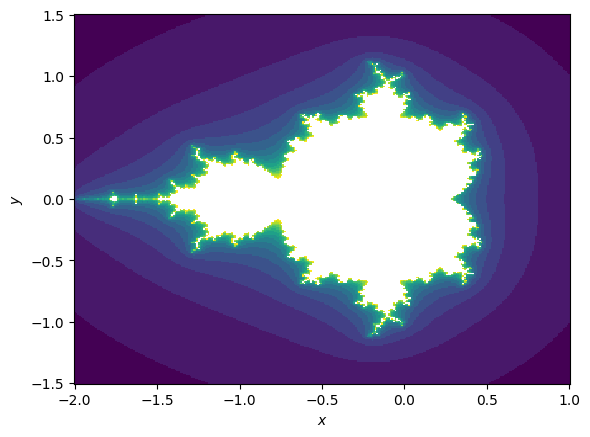

In [17]:
dx = np.linspace(-2, 1, 300)
dy = np.linspace(-1.5, 1.5, 300)
x, y= np.meshgrid(dx, dy)
z = np.empty(x.shape)

for i in range(len(dx)):
    for j in range(len(dy)):
        z[i, j] = mandelbrot(x[i, j]+1j*y[i, j],100)

plt.pcolormesh(x, y, z, shading='auto')
plt.xlabel('$x$')
plt.ylabel('$y$');

### `README.md`

- A **README.md** file is a Markdown file that provides essential information about a project.
- It’s usually the **first file** people see when visiting a project repository on platforms like GitHub.

**Why is it important?**
- **Introduction**: Helps users understand the purpose and functionality of the project.
- **Guidance**: Provides installation, usage, and configuration instructions.

**What to include?**
1. **Project Title**: The name of the project.
2. **Description**: A brief overview of the project’s purpose and features.
3. **Installation**: Step-by-step instructions for setting up the project.
4. **Usage**: Examples of how to use the project or run scripts.
5. **Contributing** (optional): Guidelines for contributing to the project.
6. **License**: Information on how the project is licensed.

## LICENSE 🧑‍⚖️

### LICENSE File

- Defines how others can use, modify, and distribute your code.
- Prevents misunderstandings about the terms of use and obligations.
- A clear license promotes contributions and sharing within the community.
- A well-defined license can make your project more appealing to potential users and contributors.

### Common Licenses for Python Projects

1. **MIT License**
   - Simple and permissive; allows almost unrestricted use.
   - Popular in open-source projects for its ease of use.

2. **GNU General Public License (GPL)**
   - Requires derivatives to also be open-source under the same license.
   - Promotes freedom and sharing of software.

3. **BSD License**
   - Similar to MIT; allows redistribution and use with few restrictions.

4. **Creative Commons Licenses**
   - Generally used for non-software projects but can apply to data and documentation.
   - Offers various levels of sharing, attribution, and modification rights.

## Python Package 📦

### An example package

- Python package bundles multiple modules into one place, to make installing and uninstalling them easier and to simplify usage.
- Think about a Python package as a bunch of `.py` files inside a directory tree.

A typical template for a fairly basic python package called `mycoolproject` might look like:

```bash
mycoolproject
 ├── __init__.py
 ├── cool_module.py
 ├── another_cool_module.py
 └── extras
      ├── __init__.py
      └── extra_stuff.py
pyproject.toml
LICENSE
README.md
```

- `__init__.py` file is slightly special (common in Python with double underscore - dunder - names).
- Read when you run `import mycoolproject` (i.e. name of the directory).
- Other files can be imported by themselves as `mycoolproject.cool_module`, `mycoolproject.another_cool_module`, etc.

### `__init__.py`

- A special Python file that indicates a directory is a **package**.
- Can be empty or contain initialization code for the package.
- Enables Python to recognize the directory as a package, allowing for module imports.
- Code within the file can set up package-level variables, import submodules, or configure package settings.
- Helps control what is imported when using `from package import *`.

**Best Practices**
- Include `__init__.py` even in Python 3 for clarity and compatibility.
- Use it to define the public API of the package by selectively importing modules or functions.

### `pyproject.toml` - Package metadata

- A configuration file used for **Python projects** to specify build system requirements and project metadata.
- Part of **PEP 518**, designed to simplify the packaging process.
- Consolidates project metadata, build system, and dependencies in a single file.
- Compatible with various tools like Poetry, Flit, setuptools, and uv.
- Modernised `setup.py`

### Structure of `pyproject.toml`

```toml
[build-system]
requires = ["setuptools", "wheel"]
build-backend = "setuptools.build_meta"

[project]
name = "my_project"
version = "0.1.0"
description = "A brief description of my project."
authors = ["Your Name <you@example.com>"]

[project.dependencies]
numpy = "^1.21.0"
matplotlib = "^3.4.0"

[project.optional-dependencies]
dev = ["pytest", "black"]
```

### Benefits of Using `pyproject.toml`

- **Simplicity**: Reduces complexity by replacing multiple configuration files (e.g., `setup.py`, `requirements.txt`).
- **Clarity**: Provides a clear, structured format for specifying project settings and dependencies.
- **Future-Proofing**: Aligns with the evolving standards of Python packaging, ensuring compatibility with new tools and practices.
- **Ease of Use**: Facilitates the installation of packages and their dependencies in isolated environments.

### Good old `setup.py`

If you see it somewhere, you can map its metadata to `pyproject.toml`:
```python
from setuptools import setup, find_packages

setup(
    name="my_project",
    version="0.1.0",
    description="A brief description of my project.",
    author="Your Name",
    author_email="you@example.com",
    packages=find_packages(),
    install_requires=[
        "numpy>=1.21.0",
        "matplotlib>=3.4.0",
    ],
    extras_require={
        "dev": [
            "pytest",
            "black",
        ],
    },
    python_requires='>=3.6',  # Specify the required Python version
    setup_requires=[
        "setuptools>=42",  # Minimum version of setuptools required
    ],
)
```

### Dependency versioning `pyproject.toml`

- **Exact Version**: 
  - Example: `numpy = "1.21.0"` 

- **Minimum Version**: 
  - Example: `matplotlib = ">=3.4.0"` 

- **Maximum Version**: 
  - Example: `matplotlib = "<4.0.0"` 

- **Version Range**: 
  - Example: `matplotlib = ">=3.4.0,<4.0.0"` 

- **Caret Operator**: 
  - Example: `numpy = "^1.21.0"` 
  - Allows versions >=1.21.0 but <2.0.0 (compatible within major version).

### Installing a Package with `pip install -e`

- The `-e` (or `--editable`) flag installs a package in **editable mode**.
- Useful for development, allowing changes to the code to be reflected immediately without reinstallation.

```bash
pip install -e .
```

### PyPI and Publishing Packages with Twine

- **[PyPI (Python Package Index)](https://pypi.org/)**: A repository for Python packages where developers can share and distribute their code.
- Makes it easy for developers to install and use packages with `pip`.

#### Publishing Your Package with `twine`

1. **Package Structure**: Ensure your package follows the proper directory structure and includes necessary files like `pyproject.toml`, `README.md`, and `LICENSE`.
2. **Build Your Package and Publish**:
    ```bash
    python -m build
    twine upload --repository testpypi dist/*
    ```

### Feedback form

I’d love to hear your thoughts on today’s lecture — your feedback helps me make future sessions better for you!

https://forms.office.com/e/BiekMgPTMm

## Exercises

### Exercise 1: Implementing a Simple Argument Parsing Script

Your task is to create a Python script that uses the [`argparse`](https://docs.python.org/3/library/argparse.html) module to perform basic arithmetic operations: addition, subtraction, multiplication, and division. The script should take the following command-line arguments:

- `--operation` or `-o`: The arithmetic operation to perform (options: `add`, `subtract`, `multiply`, `divide`).
- `--num1` or `-n1`: The first number (a float).
- `--num2` or `-n2`: The second number (a float).

The script should perform the specified operation and print the result. If the user provides an invalid operation, the script should print an error message and exit with a non-zero status. Additionally, if division is requested and the second number is zero, it should handle this gracefully by printing an error message.

1. Use the `argparse` module for parsing command-line arguments.
2. Implement the four arithmetic operations: addition, subtraction, multiplication, and division.
3. Include error handling for invalid operations and division by zero.
4. Refer to the [argparse documentation](https://docs.python.org/3/library/argparse.html) for guidance on how to implement the argument parsing.

**Example usage**
```bash
$ python arithmetic.py -o add -n1 10 -n2 5
...
$ python arithmetic.py -o multiply -n1 10 -n2 5
...
```


In [10]:
!python arithmetic.py -o add -n1 10 -n2 5

15.0


In [11]:
!python arithmetic.py -o multiply -n1 10 -n2 5

50.0


#### Solution

```python
import argparse

def main():
    # Create the parser
    parser = argparse.ArgumentParser(description="Perform basic arithmetic operations.")

    # Add arguments
    parser.add_argument('-o', '--operation', choices=['add', 'subtract', 'multiply', 'divide'],
                        required=True, help='The operation to perform: add, subtract, multiply, divide.')
    parser.add_argument('-n1', '--num1', type=float, required=True, help='The first number.')
    parser.add_argument('-n2', '--num2', type=float, required=True, help='The second number.')

    # Parse the arguments
    args = parser.parse_args()

    # Perform the operation
    if args.operation == 'add':
        result = args.num1 + args.num2
        print(f"The result of {args.num1} + {args.num2} is: {result}")
    elif args.operation == 'subtract':
        result = args.num1 - args.num2
        print(f"The result of {args.num1} - {args.num2} is: {result}")
    elif args.operation == 'multiply':
        result = args.num1 * args.num2
        print(f"The result of {args.num1} * {args.num2} is: {result}")
    elif args.operation == 'divide':
        if args.num2 == 0:
            print("Error: Division by zero is not allowed.")
        else:
            result = args.num1 / args.num2
            print(f"The result of {args.num1} / {args.num2} is: {result}")

if __name__ == "__main__":
    main()
```

### Exercise 2: Building a Numerical Package from Scratch

**Overview**
In this exercise, you will create a numerical package in Python from scratch that leverages NumPy for various numerical computations. The package will consist of multiple modules and functions for performing numerical operations. You will build the directory structure, write the necessary files (including `pyproject.toml`, `README.md`, and a `LICENSE` file), and implement unit tests to ensure the correctness of your code.

**Objectives**
1. **Package Structure**: Create a well-organized directory structure for your package.
2. **Core Functionality**: Implement several numerical functions using NumPy, such as:
   - Matrix addition and subtraction
   - Element-wise multiplication and division of arrays
   - Calculating the determinant and inverse of a matrix
   - Performing statistical calculations (mean, median, standard deviation) on a NumPy array
3. **Documentation**: Write **docstrings** for all functions, following a consistent style (e.g., NumPy or Google style). Write a `README.md` file that explains the purpose of your package, how to install it, and usage examples.
4. Create a `pyproject.toml` file that includes metadata about your package, dependencies (NumPy), and build system requirements.
5. Choose an appropriate license (e.g., MIT, BSD) and include a `LICENSE` file in your package.
6. Write unit tests for your functions using the `pytest` module to ensure they work as expected.

**Directory Structure**

The following directory structure is just a suggestion:
```
mycoolpackage/
├── __init__.py
├── linear_algebra/
│   ├── __init__.py
│   ├── matrix_operations.py
│   └── array_operations.py
│
└── statistics/
│   ├── __init__.py
│   └── statistics.py
│
├── tests/
│   └── test_mycoolpackage.py
│
├── pyproject.toml
├── README.md
└── LICENSE
```

## Optional exercises

### Exercise 3: Running Python Code

Run the following commands 

```python 
def square_and_cube(n):
    return sorted([i**2 for i in range(n)] + [i**3 for i in range(n)])
print(square_and_cube(3))
print(square_and_cube(10))
```

and 

```python
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 6*np.pi)
plt.plot(x, np.sin(x))
```
in a Jupyter notebook and in a vanilla Python interpreter.

- In each case, try modifying the `square_and_cube` function to also include the 4th power of `n`.
- The `sorted` function returns a new sorted list from an iterable. Try accessing the Python help in the ordinary interpreter to discover how to invert the order of the sorted list. Note you'll need to use the `help` function, since the `sorted?` syntax is available in IPython/Jupyter only.

### Exercise 4: Find the primes

Using VSCode (or your own prefered editor), write a Python *script* (i.e. a `.py` file) to output the first 20 prime numbers and run it from a command line.

Tips:
- One way of doing this uses an outer loop counting how many primes you have, and then code to find the next prime number.
- Note that a number cannot be prime if it divides by a prime number and that 1 is not prime. 
- If a number is not prime, it must have at least one factor smaller than its own square root. This can be used to improve the efficiency of your search.
- If `a` divides `b` exactly, then `a % b == 0`, which gives a quick test using the modulus operator `%`.

When testing your code, you should expect the output for the first 5 primes to be `[2, 3, 5, 7, 11]`.

Try to convert the script into a routine to calculate all prime numbers smaller than an input number, $n$ using `sys.argv`.

### Exercise 5: Find the mean

Write a script file (i.e. a `.py` file) to calculate the mean of a sequence of numbers. As an extension, make it take extra options (using the `argparse` module) `-b`, `-o` and `-x` to work with with binary (i.e. base 2, with `101 == 5` in decimal), octal (i.e. base 8, with `31 == 25` decimal) and hexadecimal (i.e. base 16 `2A == 42` decimal) numbers.

Test your basic script on the following sequences: `1` (mean 1) `1 5 7 13 8` (mean 6.8), `2.5, 4 ,-3.2, 9.3` (mean 3.15).

Also try feeding it no input.

_Tips_:

For the longer version you can use the 2 argument version of the `int` function to change the base of numbers. For example `int('11',2) == 3` and `int('3A', 16) == 58`.

### Exercise 6: Plots in scripts

Write a script to plot the functions $y=\sin(x)$, $y=\cos(x)$ and $y=\tan(x)$ to screen over the range [0,$2\pi$] and then run it in a terminal/prompt.

Make sure to include labels on your axes.

Change the script to output a `.png` file to disk.

Next do the same to write a `.pdf`.

### Exercise 7: Fix the script

Copy the following script into your editor/IDE and run a linter of your choice. Fix the errors and warnings that it gives you.

```python
value={1:'Ace',11:'Jack',12:'Queen',13:'King'}; 
for _ in range(2,11):
    value[_]=_
suit={0:'Spades',1:'Hearts',2:'Diamonds',3:'Clubs'}
def  the_name_of_your_card(v,s = 0,*args, **kwargs):
    
    
   """Name of card as a string.
   """ 
   if (v < 1  or v > 13 or s not in (0,1,2,3)):
      raise ValueError
      
   
   return """I have read your mind and predict your card is the %s of %s."""%(value[v], suit[ s])
print( the_name_of_your_card(2,  s= 3))
      
```

### Exercise 8: Complex square root

Write a function which accepts a real number and returns the complex square roots of that number.

Your function should include a docstring conforming to the `numpydoc` standard.</p>

_Tips_: 
<ul><li> You can use the `sqrt` function in the `math` module to obtain the square root of a positive real number.</li>
<li> Python uses the notation `1j` for a unit length imaginary number (which a mathematician would typically denote $i$), where (loosely) $\sqrt{-1}=\pm 1j$.</li></ul>

Questions: how many complex square roots does each real number have? Is it the same for **every** real number?